#  Sales over time (line charts) and monthly/quarterly aggregation.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Sales-Dashboard-practice-file.xlsx to Sales-Dashboard-practice-file.xlsx


In [6]:
import pandas as pd

df = pd.read_excel('Sales-Dashboard-practice-file.xlsx', parse_dates=['DATE'])  # parse date at read time
df.head()

,DATE,PRODUCT ID,QUANTITY,SALE TYPE,PAYMENT MODE,DISCOUNT %
0,2021-01-01,P0024,9,Wholesaler,Online,0
1,2021-01-02,P0038,15,Online,Cash,0
2,2021-01-02,P0013,6,Direct Sales,Cash,0
3,2021-01-03,P0004,5,Direct Sales,Online,0
4,2021-01-04,P0035,12,Online,Online,0


1) Line Chart — Sales Over Time (Daily)

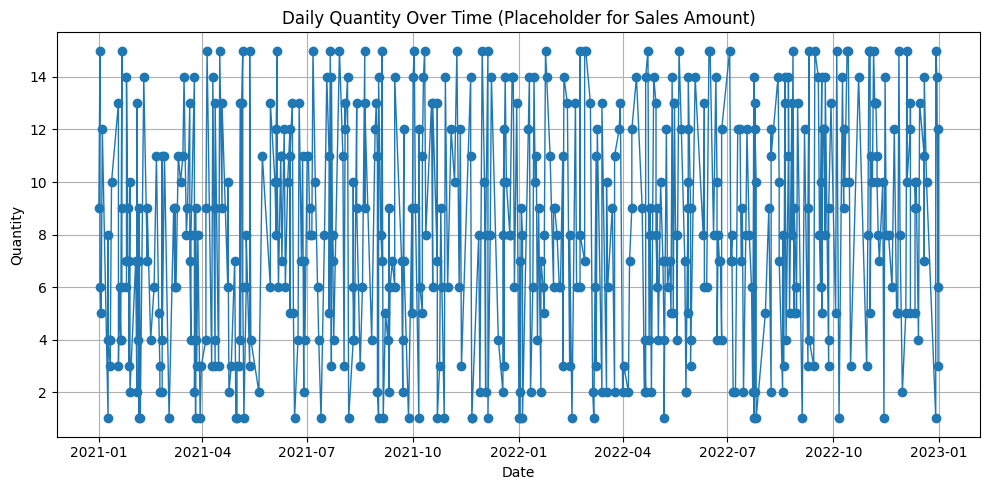

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('Sales-Dashboard-practice-file.xlsx', parse_dates=['DATE']) # Fixed: Changed to pd.read_excel

# --- Convert DATE to datetime ---
# The parse_dates argument in pd.read_excel handles this, so this line is now redundant
# df['DATE'] = pd.to_datetime(df['DATE'])

# --- Sort by date ---
df = df.sort_values('DATE')

# --- Line chart: Daily Sales Over Time ---
plt.figure(figsize=(10,5))
# Changed 'SALES_AMOUNT' to 'QUANTITY' as 'SALES_AMOUNT' is not in df.head()
plt.plot(df['DATE'], df['QUANTITY'], marker='o', linewidth=1)
plt.title('Daily Quantity Over Time (Placeholder for Sales Amount)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()


2) Line Chart — Monthly & Quarterly Aggregated Sales

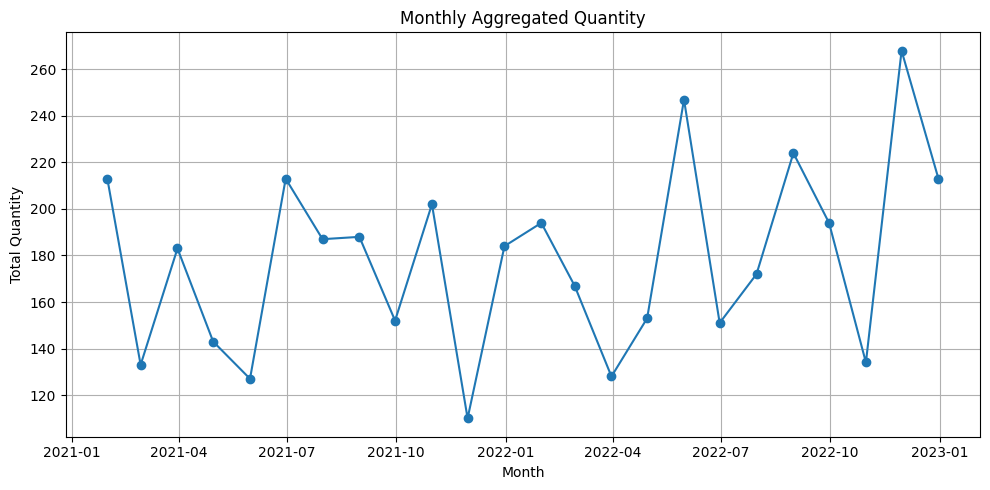

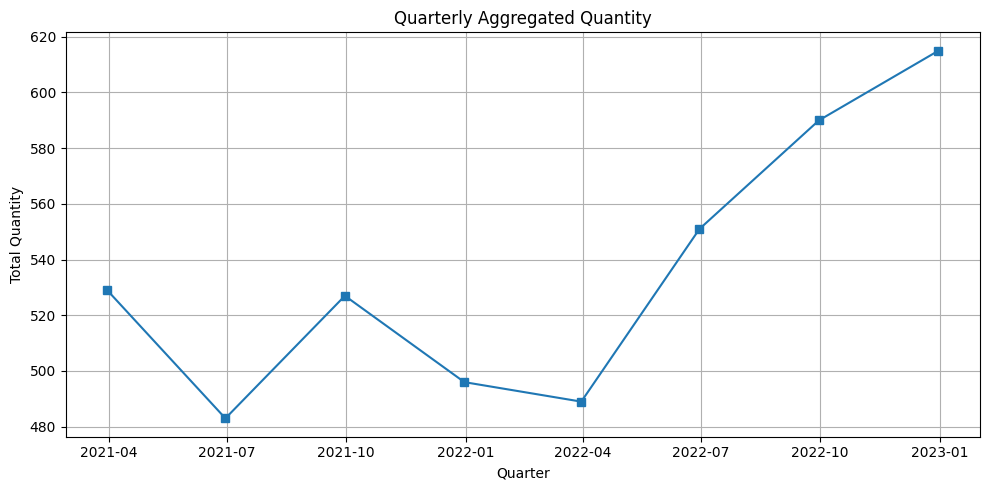

In [13]:
# --- Set date column as index for resampling ---
# df.set_index('DATE', inplace=True) # This line caused an error because 'DATE' was already the index

# --- Monthly Quantity ---
monthly_quantity = df['QUANTITY'].resample('ME').sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_quantity.index, monthly_quantity.values, marker='o')
plt.title('Monthly Aggregated Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Quarterly Quantity ---
quarterly_quantity = df['QUANTITY'].resample('QE').sum()

plt.figure(figsize=(10,5))
plt.plot(quarterly_quantity.index, quarterly_quantity.values, marker='s')
plt.title('Quarterly Aggregated Quantity')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

Task 1: Bar Chart — Compare Categories

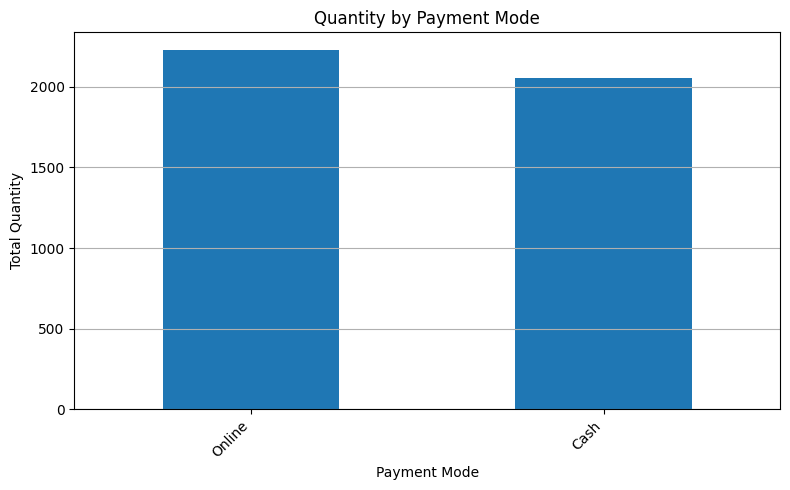

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already loaded and has QUANTITY column
sales_by_payment = df.groupby('PAYMENT MODE')['QUANTITY'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sales_by_payment.plot(kind='bar')

plt.title('Quantity by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("bar_quantity_by_payment.png", dpi=300)
plt.show()

Task 2: Pie Chart — Category Share

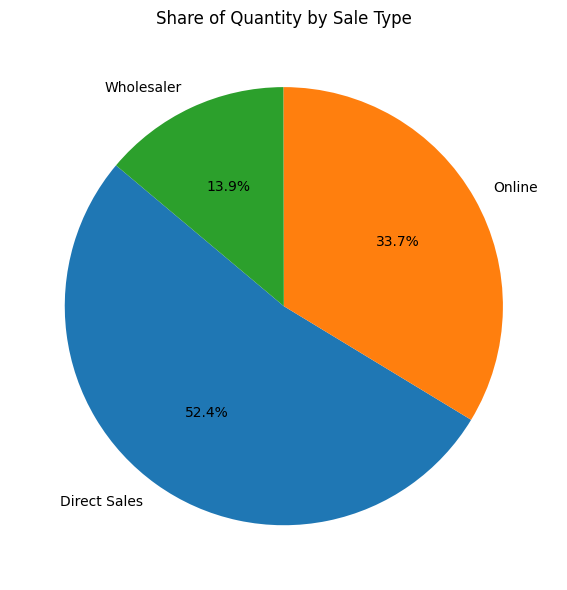

In [16]:
sales_by_type = df.groupby('SALE TYPE')['QUANTITY'].sum()

plt.figure(figsize=(6,6))
sales_by_type.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    ylabel=''     # removes default y label
)

plt.title('Share of Quantity by Sale Type')
plt.tight_layout()
plt.savefig("pie_sales_by_type.png", dpi=300)
plt.show()